# Visualisierung

## Kunst

Schreiben Sie ein Programm, das mithilfe unterschiedlicher Matplotlibbefehlen etwas kreatives darstellt. Benutzen Sie auch unterschiedliche Farben. Inspiration können Sie sich [hier](https://matplotlib.org/stable/gallery/index.html) holen.

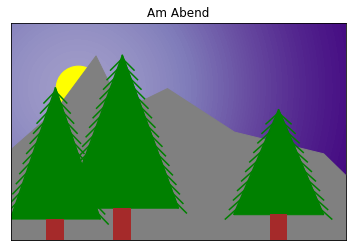

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.patheffects as path_effects

def draw_background(ax, sun_pos):
    delta = 0.5
    x = np.arange(0, 150.1, delta)
    y = np.arange(0, 100.1, delta)
    X, Y = np.meshgrid(x, y)
    Z = 1-np.exp(-0.0001*(X-sun_pos[0])**2 - 0.0001*(Y-sun_pos[1])**2)

    norm = cm.colors.Normalize(vmax=abs(Z).max(), vmin=-abs(Z).max())

    cset1 = ax.contourf(
        X, Y, Z, 100,
        norm=norm, cmap='Purples')
    
def draw_sun(ax, pos):
    plt.scatter(pos[0], pos[1], s=2000, c='yellow')
    
def draw_mountain(ax, x, y):
    ax.fill_between(x, y, color='gray')

def draw_tree_crown(ax, pos, bottom, top, width):
    x = [pos-width/2, pos, pos+width/2]
    y = [bottom, top, bottom]
    ax.fill_between(x,y,bottom, color='green')
    ax.plot(x[0:2],y[0:2], color='green', path_effects=[path_effects.withTickedStroke(angle=155)])
    ax.plot(x[1:3],y[1:3], color='green', path_effects=[path_effects.withTickedStroke(angle=25)])
    
def draw_forest(ax, pos_trees, bottom_trees, top_trees, width_trees):
    
    plt.bar(pos_trees, bottom_trees, color='brown', width=8) # tree trunks as bar plots
    for i in range(len(pos_trees)):
        draw_tree_crown(ax, pos_trees[i], bottom_trees[i], top_trees[i], width_trees[i])
    
    
sun_position = [30, 70]   
mountains_x = [0, 20, 38,50 ,70,100,140,150]
mountains_y = [42, 60, 85, 60, 70, 50, 40, 30]
pos_trees = [20, 50, 120]
bottom_trees = [10, 15, 12]
top_trees = [70, 85, 60]
width_trees=[40, 50, 40]
    
fig, ax = plt.subplots()
ax.set_xlim(0, 150)
ax.set_ylim(0, 100)
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('Am Abend')
draw_background(ax, sun_position)
draw_sun(ax, sun_position)
draw_mountain(ax, mountains_x, mountains_y)
draw_forest(ax, pos_trees, bottom_trees, top_trees, width_trees)